# Chapter 4: Exercise 14

We develop a model to predict whether a given car gets high or low gas mileage.

**Import packages**

In [125]:
import numpy as np
import pandas as pd
from ISLP import load_data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from ISLP import confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.naive_bayes import GaussianNB

### (a) Create binary variable mpg01
mpg01 = 1 if mpg > median(mpg), 0 otherwise

In [65]:
Auto = load_data('Auto')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [66]:
mpg01 = [int(b) for b in Auto['mpg'] > Auto['mpg'].median()]

In [67]:
Auto['mpg01'] = mpg01

### (b) Explore graphically the association between mpg01 and other variables

acceleration       Axes(0.125,0.53;0.168478x0.35)
cylinders       Axes(0.327174,0.53;0.168478x0.35)
displacement    Axes(0.529348,0.53;0.168478x0.35)
horsepower      Axes(0.731522,0.53;0.168478x0.35)
mpg                Axes(0.125,0.11;0.168478x0.35)
origin          Axes(0.327174,0.11;0.168478x0.35)
weight          Axes(0.529348,0.11;0.168478x0.35)
year            Axes(0.731522,0.11;0.168478x0.35)
dtype: object

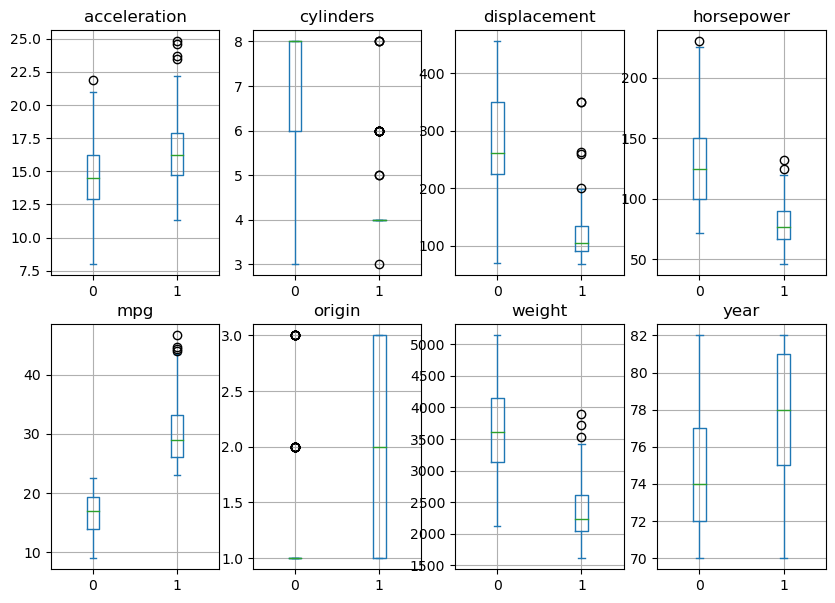

In [68]:
Auto.plot.box(by='mpg01', layout=(2,4), figsize=(10,7), grid=True)

In [69]:
Auto.corr()

C:\Users\carma\AppData\Local\Temp\ipykernel_27028\340684133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


The variables that seem most likely to be useful in predicting mpg01 are:
- Cylinders
- Displacement
- Horsepower
- Weight

Note however each of these variables is strongly correlated with eachother.

### (c) Split the data into training and test set

In [70]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(Auto.drop(labels=['mpg', 'mpg01', 'name'], axis=1),
                            Auto.drop(labels=['mpg', 'name', 'cylinders', 'displacement', \
                                             'horsepower', 'weight', 'acceleration', 'year', 'origin'], axis=1),
                            test_size=.25,
                            random_state=0)

### (d) Linear Discriminant Analysis (LDA) using displacement and weight

In [71]:
lda = LDA(store_covariance=True)

In [72]:
train, test = [M.drop(columns=['acceleration', 'year', 'origin', 'horsepower', 'cylinders']) for M in [X_train, X_test]]

In [73]:
lda.fit(train, np.ravel(y_train))

LinearDiscriminantAnalysis(store_covariance=True)

In [74]:
lda_pred = lda.predict(test)

In [75]:
confusion_table(lda_pred, np.ravel(y_test))

Truth,0,1
Predicted,,
0,37,3
1,11,47


In [76]:
np.mean(lda_pred == np.ravel(y_test))

0.8571428571428571

Overall fraction of correct predictions is 86%

In [77]:
np.mean(lda_pred != np.ravel(y_test))

0.14285714285714285

**Test error is 14%**

### (e) Quadratic Discriminant Analysis (QDA) using displacement and weight

In [78]:
qda = QDA(store_covariance=True)
qda.fit(train, np.ravel(y_train))

QuadraticDiscriminantAnalysis(store_covariance=True)

In [79]:
qda_pred = qda.predict(test)

In [80]:
confusion_table(qda_pred, np.ravel(y_test))

Truth,0,1
Predicted,,
0,39,7
1,9,43


In [81]:
np.mean(qda_pred == np.ravel(y_test))

0.8367346938775511

Overall fraction of correct predictions is 84%

In [82]:
np.mean(qda_pred != np.ravel(y_test))

0.16326530612244897

**Test error is 16%**

### (f) Logistic Regression using displacement and weight

In [83]:
model = MS(['displacement', 'weight']).fit(Auto)

In [83]:
logr_train = train.copy()
logr_test = test.copy()
logr_train['intercept'] = 1
logr_test['intercept'] = 1

In [119]:
glm_train = sm.GLM(np.ravel(y_train),
                   logr_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=logr_test)

In [120]:
labels = np.array([0]*98)

In [121]:
labels[probs>0.5] = 1

In [122]:
confusion_table(labels, np.ravel(y_test))

Truth,0,1
Predicted,,
0,38,7
1,10,43


In [123]:
np.mean(labels == np.ravel(y_test))

0.826530612244898

Overall fraction of correct predictions is 83%

In [124]:
np.mean(labels != np.ravel(y_test))

0.17346938775510204

**Test error is 17%**

### (g) Naive Bayes using displacement and weight

In [132]:
NB = GaussianNB()
NB.fit(train, np.ravel(y_train))

GaussianNB()

In [133]:
nb_labels = NB.predict(test)
confusion_table(nb_labels, np.ravel(y_test))

Truth,0,1
Predicted,,
0,38,6
1,10,44


In [134]:
np.mean(nb_labels == np.ravel(y_test))

0.8367346938775511

Overall fraction of correct predictions is 84%

In [135]:
np.mean(nb_labels != np.ravel(y_test))

0.16326530612244897

**Test error is 16%**

### (h) KNN using displacement and weight and several values for K